
# ■ 束縛状態のエネルギー固有状態を数値的に計算する

束縛状態（粒子が系から逃げていかない）では、エネルギー固有値は離散化し、離散的なエネルギー固有状態をとります。このエネルギー固有状態は互いに直交していたるので、これを線型空間の基底ベクトルとして、状態をベクトル、演算子を行列として扱うことができます。

## 時間依存シュレーディンガー方程式

シュレーディンガー方程式は、時間依存する波動関数 $ \Psi(x,t) $ に対して次の形で表されます。

$$ i \hbar \frac{\partial}{\partial t} \Psi(x,t) = \hat{H} \Psi(x,t), $$

ここで、$ \hat{H} $ はハミルトニアン演算子です。



## 時間と空間の分離

波動関数を次のように時間と空間に分離します。

$$ \Psi(x,t) = \psi(x) \cdot e^{-iE t / \hbar}, $$

ここで、$ \psi(x) $ は空間に依存する波動関数であり、$ E $ はエネルギー固有値です。これをシュレーディンガー方程式に代入すると、時間依存部分が消え、次の時間独立シュレーディンガー方程式を得ます。

$$ \hat{H} \psi(x) = E \psi(x), $$

これがエネルギー固有方程式です。



## 数値解法の概要

### 空間の離散化

空間を離散的な格子点に分割し、波動関数 $ \psi(x) $ をこれらの格子点における値のベクトルとして表現します。格子点は例えば $ x_1, x_2, \dots, x_N $ とし、各点での波動関数の値は $ \psi_1, \psi_2, \dots, \psi_N $ となります。



### 行列の構成

ハミルトニアン $ \hat{H} $ には、運動エネルギー項とポテンシャルエネルギー項が含まれます。運動エネルギー項は、波動関数の二階微分であり、これを離散化すると、次のような有限差分近似が得られます。

$$ \frac{d^2 \psi}{dx^2} \approx \frac{\psi_{i+1} - 2\psi_i + \psi_{i-1}}{\Delta x^2}, $$

これを行列形式で表すと、運動エネルギー部分に対応する行列 $ T $ は次のようになります。

$$ T = -\frac{\hbar^2}{2m}
\begin{pmatrix}
-2 & 1 & 0 & \cdots & 0 \\
1 & -2 & 1 & \cdots & 0 \\
0 & 1 & -2 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & 1 \\
0 & 0 & 0 & 1 & -2
\end{pmatrix}, $$

ポテンシャルエネルギー項は、ポテンシャル $ V(x) $ に依存する対角行列 $ V $ として表現されます。

$$ V = 
\begin{pmatrix}
V(x_1) & 0 & 0 & \cdots & 0 \\
0 & V(x_2) & 0 & \cdots & 0 \\
0 & 0 & V(x_3) & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & 0 \\
0 & 0 & 0 & 0 & V(x_N)
\end{pmatrix}. $$

総ハミルトニアンは、これら二つの行列を足し合わせたものです。

$$ H = T + V. $$



### 境界条件

典型的な境界条件は、$ \psi(x) $ が領域の端でゼロになるディリクレ境界条件です。すなわち、

$$ \psi(x_1) = \psi(x_N) = 0. $$

これにより、波動関数が閉じた領域内でのみ定義され、数値解が安定します。実際にはハミルトニアンの行列要素 $H_{0.0}$、$H_{N-1,N-1}$成分を十分大きな数に設定し、$H_{0,1}$と、$H_{N-1,N-2}$を0にします。（これで、上記の境界条件が課されることをベクトル化した状態の左端と右端だけ考察して考えてみましょう）


### エネルギー固有値と固有関数の数値解

行列 $ H $ に対して固有値問題

$$ H \vec{\psi} = E \vec{\psi} $$

を解くことで、エネルギー固有値 $ E $ と対応する固有ベクトル $ \vec{\psi} $ を得ることができます。これらが波動関数 $ \psi(x) $ の数値解です。


最初の5つのエネルギー固有値:  [0.49999687 1.49998436 2.49995933 3.4999218  4.49987174]


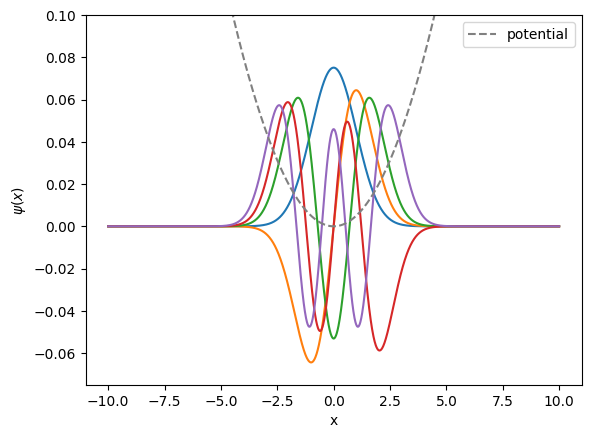

In [119]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# 定数の設定
hbar = 1.0  # 簡単のために hbar = 1
m = 1.0     # 質量も m = 1 に設定
omega = 1.0 # 調和振動子の角振動数

N = 2000    # 空間分割数
x_min, x_max = -10.0, 10.0  # 空間範囲
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]  # 空間のステップ

# ポテンシャル (例えば、調和振動子のポテンシャル V(x) = 1/2 * m * w^2 * x^2)
V = 0.5 * m * omega**2 * x**2  # 調和振動子のポテンシャル

# ハミルトニアン行列の生成
H = np.zeros((N, N))

# 対角成分
for i in range(1, N-1):
    H[i, i] = + 2 * hbar**2 / (2 * m * dx**2) + V[i]

# 非対角成分
for i in range(1, N-1):
    H[i, i+1] = H[i+1, i] = - hbar**2 / (2 * m * dx**2)

# 境界での条件を反映させるために、端点でハミルトニアン行列をゼロにする
H[0, 0] = H[N-1, N-1] = 1/dx  # 端点をゼロに固定するための処理
H[0, 1] = H[N-1, N-2] = 0.0  # 端点では波動関数がゼロ

# 固有値と固有ベクトルを計算
E, psi = la.eigh(H)

# 固有値を表示
print("最初の5つのエネルギー固有値: ", E[:5])

# 最初の固有関数をプロット
plt.ylim(-0.075, 0.1)      # y軸の範囲を調整
for i in range(5):
    plt.plot(x, psi[:, i])

plt.plot(x, V*0.01,label='potential', linestyle='--',color='gray') #見やすいようにスケール倍
plt.xlabel('x')
plt.ylabel(r'$\psi(x)$')
plt.legend()
plt.show()


重ねて描かれていて見にくいので、少し並行移動して見栄えをよくしてみます。

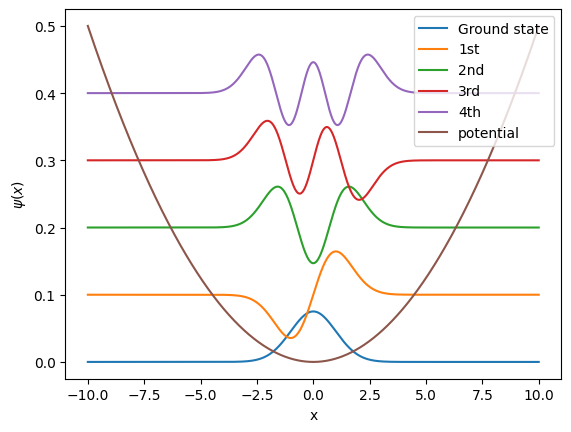

In [101]:
plt.plot(x, psi[:, 0],label='Ground state')
plt.plot(x, psi[:, 1]+.1,label='1st')
plt.plot(x, psi[:, 2]+.2,label='2nd')
plt.plot(x, psi[:, 3]+.3,label='3rd')
plt.plot(x, psi[:, 4]+.4,label='4th')
plt.plot(x, V*0.01,label='potential')

plt.xlabel('x')
plt.ylabel(r'$\psi(x)$')
plt.legend()
plt.show()

次に、実際に解析的に解を求めるのが難しい、有限高さの井戸型ポテンシャルにおいて計算して見ましょう。ポテンシャルの中にも波動関数が染み出している状況が見て取れます。ポテンシャルの高さを無限にすると、境界条件が0となり簡単に解ける問題になります。

最初の5つのエネルギー固有値:  [0.16592275 0.66275126 1.48746026 2.63419563 4.09245102]


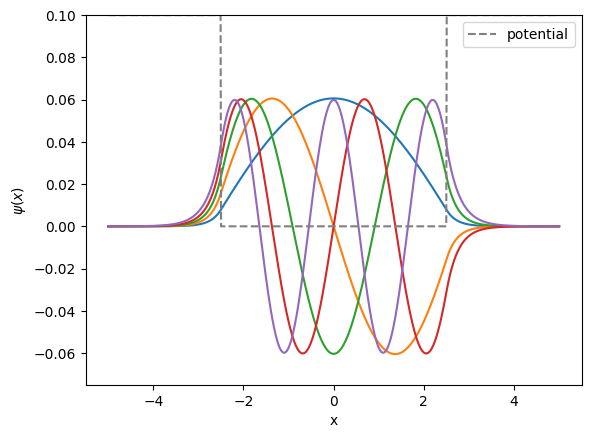

In [118]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# 定数の設定
hbar = 1.0  # 簡単のために hbar = 1
m = 1.0     # 質量も m = 1 に設定
omega = 1.0 # 調和振動子の角振動数

N = 1000    # 空間分割数
x_min, x_max = -5.0, 5.0  # 空間範囲
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]  # 空間のステップ

# ポテンシャル (幅 a, 高さ V0 の箱型ポテンシャル)
a=5
V0 = 10

V = np.zeros((N))
V[np.abs(x) > a/2] = V0


# ハミルトニアン行列の生成
H = np.zeros((N, N))

# 対角成分
for i in range(1, N-1):
    H[i, i] = + 2 * hbar**2 / (2 * m * dx**2) + V[i]

# 非対角成分
for i in range(1, N-1):
    H[i, i+1] = H[i+1, i] = - hbar**2 / (2 * m * dx**2)

# 境界での条件を反映させるために、端点でハミルトニアン行列をゼロにする
H[0, 0] = H[N-1, N-1] = 1/dx  # 端点をゼロに固定するための処理
H[0, 1] = H[N-1, N-2] = 0.0  # 端点では波動関数がゼロ

# 固有値と固有ベクトルを計算
E, psi = la.eigh(H)

# 固有値を表示
print("最初の5つのエネルギー固有値: ", E[:5])

# 最初の固有関数をプロット
plt.ylim(-0.075, 0.1)      # y軸の範囲を調整
for i in range(5):
    plt.plot(x, psi[:, i])

plt.plot(x, V*0.01,label='potential', linestyle='--',color='gray') #見やすいようにスケール倍
plt.xlabel('x')
plt.ylabel(r'$\psi(x)$')
plt.legend()
plt.show()

# ■SymPy入門：未知の変数を扱った数式の処理

ここまでの数値計算では関数は、引数を離散化することで数列として扱ってきました。抽象的な関数として扱うことができなかったので、厳密に微分を計算したり、式を整理したりはできませんでした。しかし、pythonでは SymPy というライブラリがあり、数式を値を代入せず未知変数に対する式として扱うことができます。

## SymPyのインストールと基本設定
SymPyがインストールされていない場合は、以下のコマンドでインストールします。以下の # を消してください。!はGoogle collaboratory などを利用して jupyter notebook上でインストールを実行するためのものです。ローカルPCのターミナルから、インストールする場合は、! も消してください。


In [122]:
# !pip install sympy   

Jupyter Notebookで使用する場合は、以下のようにライブラリをインポートします。



In [123]:
import sympy as sp
sp.init_printing()  # 数式を見やすく表示するための設定

## シンボルと式の定義
シンボルの定義：SymPyで計算を行うには、まず変数をシンボル（未知の=値が代入されていない変数）として定義します。

In [124]:
x, y, z = sp.symbols('x y z')


式の定義：定義したシンボルを使って数式を定義します。

In [125]:
expr = x**2 + 2*x + 1
expr

## 微分の実行
SymPyを使って関数を微分します。

In [126]:
# 関数の定義
f = sp.sin(x) * sp.exp(x)

# xに関する一階微分
df_dx = sp.diff(f, x)
df_dx


In [127]:
# xに関する二階微分
d2f_dx2 = sp.diff(f, x, 2)
d2f_dx2

## 多項式の整理と展開
式の展開

In [128]:
# 展開前の式
expr = (x + 1)**3
expr

# 展開後の式
expanded_expr = sp.expand(expr)
expanded_expr


式の簡略化

In [129]:
# 簡略化前の式
expr = sp.sin(x)**2 + sp.cos(x)**2
expr

# 簡略化後の式
simplified_expr = sp.simplify(expr)
simplified_expr


## 因数分解

In [130]:
# 因数分解する多項式
poly = x**3 - 3*x**2 + 3*x - 1
poly

# 因数分解
factored_poly = sp.factor(poly)
factored_poly


## ラプラス変換
$ \exp(-a*t)$のラプラス変換

In [132]:
# シンボルの定義
t, s, a = sp.symbols('t s a', real=True, positive=True)

# 関数の定義
f = sp.exp(-a * t)
print(f)

# ラプラス変換
F = sp.laplace_transform(f, t, s)
F


exp(-a*t)


⎛  1            ⎞
⎜─────, -a, True⎟
⎝a + s          ⎠

$\sin(\omega t)$のラプラス変換

In [133]:
# シンボルの定義
t, s, omega = sp.symbols('t s omega', real=True, positive=True)

# 関数の定義
f = sp.sin(omega * t)
print(f)

# ラプラス変換
F = sp.laplace_transform(f, t, s)
F

sin(omega*t)


⎛   ω            ⎞
⎜───────, 0, True⎟
⎜ 2    2         ⎟
⎝ω  + s          ⎠

## フーリエ変換
ガウス関数 $ exp(-x^2) $のフーリエ変換

In [134]:
# シンボルの定義
x, k = sp.symbols('x k', real=True)

# 関数の定義
f = sp.exp(-x**2)

# フーリエ変換
F = sp.fourier_transform(f, x, k)
F


矩形関数のフーリエ変換

In [135]:
# シンボルの定義
x, k, a = sp.symbols('x k a', real=True, positive=True)

# 関数の定義（矩形関数）
f = sp.Piecewise((1, sp.Abs(x) <= a), (0, True))

# フーリエ変換
F = sp.fourier_transform(f, x, k)
F


                ⎛⎧1  for a ≥ x      ⎞
FourierTransform⎜⎨            , x, k⎟
                ⎝⎩0  otherwise      ⎠

## 数式から作図

フーリエ変換結果に対して、数値的に評価し、作図します。

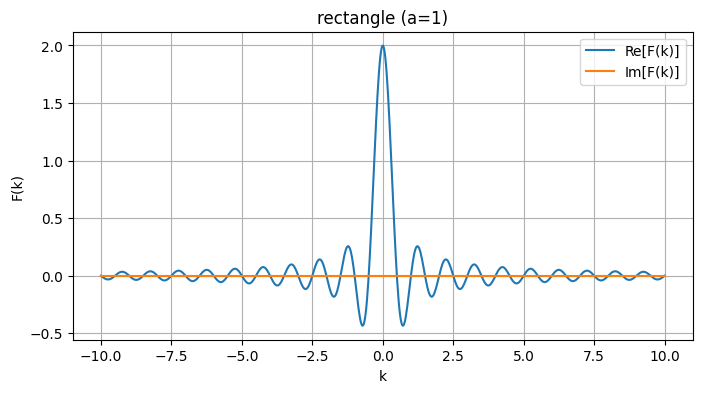

In [140]:
# シンボルの定義
x, k = sp.symbols('x k', real=True)
a = sp.symbols('a', real=True, positive=True)

# 関数の定義（矩形関数）
f = sp.Piecewise((1, sp.Abs(x) <= a), (0, True))

# フーリエ変換
F = sp.fourier_transform(f, x, k)
F_simplified = sp.simplify(F)
F_simplified

# aに値を代入
a_value = 1
F_numeric = F_simplified.subs(a, a_value)

# 数値評価用の関数に変換
F_func = sp.lambdify(k, F_numeric, 'numpy')

# kの値の範囲を設定
k_vals = np.linspace(-10, 10, 800)

# F(k)の値を計算
F_vals = F_func(k_vals)

# 作図
plt.figure(figsize=(8, 4))
plt.plot(k_vals, F_vals.real, label='Re[F(k)]')
plt.plot(k_vals, F_vals.imag, label='Im[F(k)]')
plt.title('rectangle (a={})'.format(a_value))
plt.xlabel('k')
plt.ylabel('F(k)')
plt.legend()
plt.grid(True)
plt.show()


## 量子力学で習った直交多項式は SymPy であらかじめ用意されています。

エルミート多項式は物理学や工学で重要な役割を果たす直交多項式の一つです。SymPyでは、hermite関数を使用してエルミート多項式を定義できます。

In [196]:
from sympy import hermite

# シンボルの定義
x = sp.symbols('x')

# エルミート多項式の定義（次数 n）
n = sp.symbols('n', integer=True, nonnegative=True)
H_n = sp.hermite(n, x)
H_n

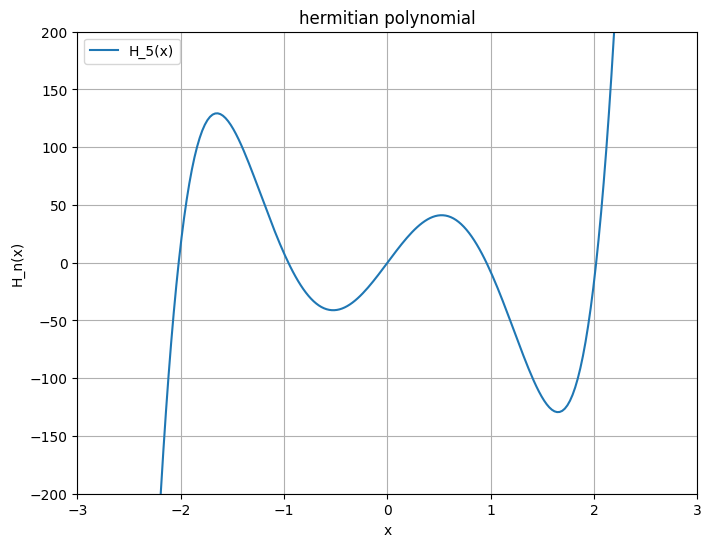

In [197]:
# n の値のリスト
n_values = [0, 1, 2, 3, 4]

# x の値の範囲
x_vals = np.linspace(-5, 5, 400)

# 作図
plt.figure(figsize=(8, 6))

n_val=5
# エルミート多項式を数値関数に変換
H_n_expr = sp.hermite(n_val, x)
H_n_func = sp.lambdify(x, H_n_expr, 'numpy')
# y の値を計算
y_vals = H_n_func(x_vals)
# 作図
plt.plot(x_vals, y_vals, label=f'H_{n_val}(x)')

plt.title('hermitian polynomial')
plt.xlabel('x')
plt.ylabel('H_n(x)')
plt.xlim(-3,3)
plt.ylim(-200,200)
plt.legend()
plt.grid(True)
plt.show()


## 方程式や常微分方程式を形式的に解くこともできます。
微分方程式 $a x^2 + b x +c =0$を解いて見ましょう。

In [203]:
import sympy as sp
sp.init_printing()  # 数式を見やすく表示するための設定

# シンボルの定義
a, b, c, x = sp.symbols('a b c x')

# 方程式の定義
equation = sp.Eq(a*x**2 + b*x + c, 0)

# 方程式の解法
solutions = sp.solve(equation, x)
solutions


常微分方程式、
$$ 
\frac{dy(x)}{dx} + y(x) = \sin (x)
$$
を解いて見ましょう。

In [202]:
import sympy as sp
sp.init_printing()

# シンボルの定義
x = sp.symbols('x')
y = sp.Function('y')

# 微分方程式の定義
ode = sp.Eq(y(x).diff(x) + y(x), sp.sin(x))

# 微分方程式の解法
sol = sp.dsolve(ode, y(x))
sol

# ■ 本日の課題： 
- (1) SymPy の solveを用いて、3次方程式の一般解を求めてください。
- (2) SymPy の dsolveを用いて何か微分方程式を解いて見てください。

# ■ SymPyを用いて量子力学の公理の理解
Sympyでは数式を形式的に値を代入することなく扱うことができます。

## 量子力学の公理１：量子状態
有限次元の量子系は、$d$次元の大きさが1に規格化された複素ベクトル（ヒルベルト空間）として記述されます。以下では、$d=3$を例にします。

In [11]:
from sympy import symbols, Matrix, I, simplify
from sympy.physics.quantum import Dagger

# 複素数の成分を持つシンボルの定義
a1, a2, a3 = symbols('a1 a2 a3', complex=True)

# 状態ベクトルの定義
ket = Matrix([[a1], [a2], [a3]])
display(ket)

# ノルムの計算
norm_squared = (Dagger(ket) * ket)[0]
display(norm_squared)



⎡a₁⎤
⎢  ⎥
⎢a₂⎥
⎢  ⎥
⎣a₃⎦

## 量子力学の公理２：時間発展
時間発展はユニタリー行列$U$によって与えられます。ユニタリーであることは確率を保存（状態ベクトルの規格化条件を保存）するために必要です。また、具体的にハミルトニアンが与えられている場合は、$U=e^{-i Ht}$でユニタリー行列が与えられます。（換算プランク定数は1としました）。

In [17]:
from sympy import exp, I

# ハミルトニアンの定義（エルミート行列）
H = Matrix([[0, 1, 0],
            [1, 0, 1],
            [0, 1, 0]])

# 時間変数の定義
t = symbols('t', real=True)

# ユニタリー演算子の計算
U = exp(-I * H * t)
display(U)

# ユニタリー性の確認（U * U^† = I）
unitary_check = simplify(U * Dagger(U))
display(unitary_check)


⎡   √2⋅ⅈ⋅t        -√2⋅ⅈ⋅t          √2⋅ⅈ⋅t       -√2⋅ⅈ⋅t     √2⋅ⅈ⋅t        -√2⋅
⎢  ℯ         1   ℯ             √2⋅ℯ         √2⋅ℯ           ℯ         1   ℯ    
⎢  ─────── + ─ + ────────    - ────────── + ───────────    ─────── - ─ + ─────
⎢     4      2      4              4             4            4      2      4 
⎢                                                                             
⎢      √2⋅ⅈ⋅t       -√2⋅ⅈ⋅t       √2⋅ⅈ⋅t    -√2⋅ⅈ⋅t            √2⋅ⅈ⋅t       -√
⎢  √2⋅ℯ         √2⋅ℯ             ℯ         ℯ               √2⋅ℯ         √2⋅ℯ  
⎢- ────────── + ───────────      ─────── + ────────      - ────────── + ──────
⎢      4             4              2         2                4             4
⎢                                                                             
⎢   √2⋅ⅈ⋅t        -√2⋅ⅈ⋅t          √2⋅ⅈ⋅t       -√2⋅ⅈ⋅t     √2⋅ⅈ⋅t        -√2⋅
⎢  ℯ         1   ℯ             √2⋅ℯ         √2⋅ℯ           ℯ         1   ℯ    
⎢  ─────── - ─ + ────────    - ────────── + ────────

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

## 量子力学の公理３：測定
測定は、正規直交基底 $|0\rangle, |1\rangle, |2\rangle$ を選ぶことで定義され、測定結果が得られる確率は、状態$|\psi \rangle$との
内積の絶対値の２乗（ボルンルール）で与えられます。
$$
p_0 = |\langle i| \psi \rangle |^2 
$$

もしくは、射影演算子 $P_i = |i \rangle \langle i |$ を定義して、
$$
p_0 = \langle \psi |P_i | \psi \rangle 
$$
としても同じです。

測定結果$i$を得た時の測定後の状態は、
$$
P_i |\psi \rangle / \sqrt{p_i} = |i\rangle
$$
になります。

また、直交基底の代わりにエルミート行列$A$（物理量、もしくは可換測量）を定義しても構いません。この場合、$A$の固有状態が、基底$\{ |i\rangle \}$になります。また、固有値が測定結果$i$を得た時の物理量の値になります。

In [36]:
from sympy import sqrt
# 観測量（エルミート演算子）の定義
A = Matrix([[3, 0, 0],
            [0, 1, 0],
            [0, 0, -5]])

#この行列の固有状態を定義しておく
ket0 = Matrix([[1], [0], [0]])
ket1 = Matrix([[0], [1], [0]])
ket2 = Matrix([[0], [0], [1]])

display(ket0,ket1,ket2)

# 射影演算子（例として状態ベクトル自身に対応するもの）
P0 = ket0 * Dagger(ket0)
P1 = ket1 * Dagger(ket1)
P2 = ket2 * Dagger(ket2)
display(P0,P1,P2)

#測定結果 0 を得る確率
p0 = abs( Dagger(ket0) * ket )[0]**2
display(p0)

p1 = abs( Dagger(ket1) * ket )[0]**2
p2 = abs( Dagger(ket2) * ket )[0]**2

# 測定後の状態

post_measurement_state = simplify(P0 * ket/sqrt(p0))
display(post_measurement_state)

# 期待値の計算
expectation_value = simplify((Dagger(ket) * A * ket)[0])
display(expectation_value)

display(p0*3 + p1*1 + p2*(-5))


⎡1⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

⎡0⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣0⎦

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣1⎦

⎡1  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

⎡0  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  0⎦

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  1⎦

⎡ a₁ ⎤
⎢────⎥
⎢│a₁│⎥
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎣ 0  ⎦

## 量子力学の公理４：複合系
基底が$ \{ |1\rangle _b, |2\rangle_b , |3\rangle _b\}$ で与えられる量子系Bと、基底が$\{ |1\rangle _c, |2\rangle_c\}$で与えられる量子系Cがある時、それぞれの個別の系は、
$$
|\psi \rangle _b = b_1 | 1\rangle_b + b_2 |2\rangle_b + b_3 |3\rangle _b
$$
や
$$
|\phi \rangle _c = c_1| 1\rangle_c + c_2 |2\rangle_c
$$
といった状態をとることができます。しかし、BとCを合わせた全系はもっと一般的な状態をとることができます。２つの系が存在するということを明示的に書くためにテンソル積$\otimes$のマークを用いて記述しましょう。$|\psi \rangle _b$と$|\phi \rangle _c$がある場合、全系の状態は、
$$ 
|\psi \rangle _b \otimes |\phi \rangle _c
$$
となります。このような状態は直積状態（B系とC系の状態が独立な状態になっている）といいます。同様に、以下の直積状態も全て取りうる状態です。
$$
|1\rangle _b \otimes |1\rangle _c , \;\;\; |1\rangle _b \otimes |2 \rangle _c ,\;\;\; |2\rangle _b \otimes |1\rangle _c ,\;\;\; |2\rangle _b \otimes |2 \rangle _c , \;\;\;
|3\rangle _b \otimes |1\rangle _c ,\;\;\; |3\rangle _b \otimes |2 \rangle _c .
$$
量子力学では直交する状態の線形和（重ね合わせ）も状態として許されているので、この６つの基底で貼られた線型空間（テンソル積空間）として合成系の状態が記述されます。
この合成系には、直積状態として書けないようなエンタングルした状態も含まれます。
$$
|\Psi \rangle _{bc} = a_{1} |1\rangle _b \otimes |1\rangle _c +a_{2} |1\rangle _b \otimes |2 \rangle _c +a_{3} |2\rangle _b \otimes |1\rangle _c +a_{4} |2\rangle _b \otimes |2 \rangle _c +a_{5}
|3\rangle _b \otimes |1\rangle _c +a_{6} |3\rangle _b \otimes |2 \rangle _c .
$$





In [39]:
from sympy.physics.quantum.tensorproduct import TensorProduct

# 系1の状態ベクトル
b1, b2, b3 = symbols('b1 b2 b3', complex=True)
ket1 = Matrix([[b1], [b2], [b3]])
display(ket1)

# 系2の状態ベクトル
c1, c2 = symbols('c1 c2', complex=True)
ket2 = Matrix([[c1], [c2]])
display(ket2)

# 複合系の状態ベクトル（テンソル積）
ket_total = TensorProduct(ket1, ket2)
display(ket_total)


⎡b₁⎤
⎢  ⎥
⎢b₂⎥
⎢  ⎥
⎣b₃⎦

⎡c₁⎤
⎢  ⎥
⎣c₂⎦

⎡b₁⋅c₁⎤
⎢     ⎥
⎢b₁⋅c₂⎥
⎢     ⎥
⎢b₂⋅c₁⎥
⎢     ⎥
⎢b₂⋅c₂⎥
⎢     ⎥
⎢b₃⋅c₁⎥
⎢     ⎥
⎣b₃⋅c₂⎦

上記のようにベクトルの要素の掛け算で大きなベクトルを定義する手続きはクロネッカー積と呼ばれます。